In [13]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [14]:
N = 1000

# Erstelle zufällig eingabe
x =torch.rand(N, 2)




In [15]:
print(x.shape)

torch.Size([1000, 2])


In [16]:
x

tensor([[0.1868, 0.3576],
        [0.6797, 0.7502],
        [0.1502, 0.6279],
        ...,
        [0.5284, 0.9340],
        [0.5262, 0.8127],
        [0.4890, 0.6949]])

In [17]:
# Definiere Funktion f, welche aus Eingabewerten eine eindimensionale Ausgabe erzeugt.
def f(x):
    val = x[:,0]  + x[:,1]
    return val

In [18]:
y = f(x)
#y = torch.rand(N, 1)


In [19]:
y

tensor([0.5444, 1.4299, 0.7782, 0.7351, 0.5298, 0.2085, 0.3347, 0.5514, 0.8678,
        1.4654, 0.9908, 0.7053, 0.8655, 1.1664, 0.6748, 1.7102, 0.5005, 0.9752,
        0.9174, 1.1534, 0.8335, 1.3786, 0.5502, 1.0860, 0.6505, 0.2256, 0.1990,
        0.9771, 0.4010, 1.2254, 1.5462, 1.8034, 1.0014, 0.7682, 0.9155, 0.8730,
        0.9336, 0.6816, 0.7198, 0.6083, 0.1721, 1.3150, 1.4706, 0.5335, 0.7847,
        0.8106, 0.3313, 1.1440, 1.7891, 0.9618, 1.5452, 1.3350, 0.8757, 1.1488,
        1.4777, 1.7856, 0.1688, 0.7690, 1.7719, 1.6454, 0.5558, 1.1852, 0.7007,
        0.6829, 1.5754, 0.6701, 0.8859, 0.2351, 0.6375, 0.7353, 1.1727, 0.7435,
        1.8301, 1.8282, 1.4591, 0.3965, 0.3989, 0.7968, 1.8631, 1.2692, 0.4716,
        1.7023, 0.8333, 1.3579, 0.6010, 1.6920, 1.6058, 0.4041, 1.1826, 1.4071,
        0.4104, 0.0757, 0.6536, 0.6136, 0.5990, 0.3140, 0.5672, 1.0575, 0.9861,
        0.9640, 0.7381, 0.4405, 0.9601, 1.4630, 0.7851, 1.2512, 1.2130, 0.9366,
        1.4000, 0.9122, 0.3038, 0.9774, 

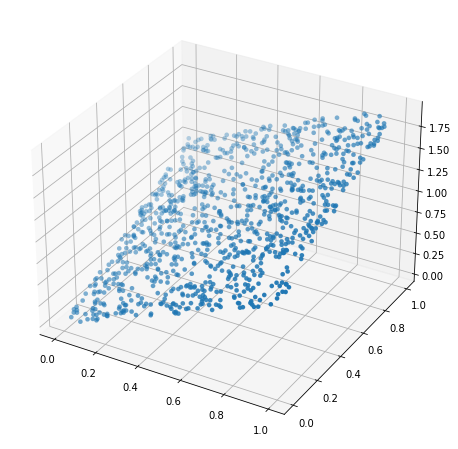

In [20]:
fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.gca(projection='3d')

ax.scatter(x[:,0].tolist(), x[:,1].tolist(),y.tolist(), linewidth=0.1, antialiased=True)

plt.show()

In [21]:
model = torch.nn.Sequential(
          torch.nn.Linear(x.shape[1], 5),
          torch.nn.Tanh(),
          torch.nn.Linear(5, 1), 
        )

loss_fn = torch.nn.MSELoss(reduction='sum')

# Training

In [22]:
training = []

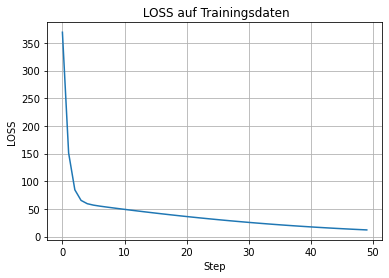

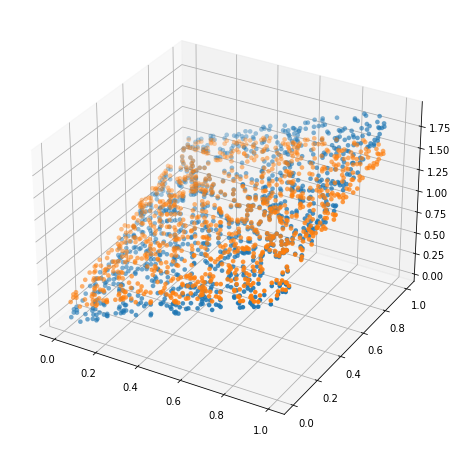

In [23]:
learning_rate = 1e-4


for t in range(50):
      
    
    y_pred = model(x)

  
    loss = loss_fn(torch.reshape(y_pred, (-1,)), y)
    
    training.append([loss, model.named_parameters()])
  
# Autograd

    model.zero_grad()

    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            #Gradientenabstieg
            param.data -= learning_rate * param.grad

loss = [step[0] for step in training]
fig, ax = plt.subplots()

ax.plot(loss)

ax.set(ylabel='LOSS', xlabel='Step',
       title=' LOSS auf Trainingsdaten')
ax.grid()

#fig.savefig("test.png")
plt.show()


fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.gca(projection='3d')

ax.scatter(x[:,0].tolist(), x[:,1].tolist(),y.tolist(), linewidth=0.1, antialiased=True)
ax.scatter(x[:,0].tolist(), x[:,1].tolist(),torch.reshape(y_pred, (-1,)).tolist(), linewidth=0.1, antialiased=True)

plt.show()


In [24]:
for step in training:
    print('-----------------------------------------')
    for name, param in step[1]:
            print(param.data) 
            print(name, param)

-----------------------------------------
tensor([[ 0.3551,  0.6401],
        [-0.7444,  0.5166],
        [ 0.4749,  0.3703],
        [-0.3842, -0.5408],
        [ 0.3382,  0.4362]])
0.weight Parameter containing:
tensor([[ 0.3551,  0.6401],
        [-0.7444,  0.5166],
        [ 0.4749,  0.3703],
        [-0.3842, -0.5408],
        [ 0.3382,  0.4362]], requires_grad=True)
tensor([-0.0472, -0.0206, -0.0850,  0.1229,  0.4399])
0.bias Parameter containing:
tensor([-0.0472, -0.0206, -0.0850,  0.1229,  0.4399], requires_grad=True)
tensor([[ 0.7019, -0.2717,  0.2422, -0.6498,  0.3490]])
2.weight Parameter containing:
tensor([[ 0.7019, -0.2717,  0.2422, -0.6498,  0.3490]], requires_grad=True)
tensor([0.1649])
2.bias Parameter containing:
tensor([0.1649], requires_grad=True)
-----------------------------------------
tensor([[ 0.3551,  0.6401],
        [-0.7444,  0.5166],
        [ 0.4749,  0.3703],
        [-0.3842, -0.5408],
        [ 0.3382,  0.4362]])
0.weight Parameter containing:
tensor([

tensor([-0.0472, -0.0206, -0.0850,  0.1229,  0.4399])
0.bias Parameter containing:
tensor([-0.0472, -0.0206, -0.0850,  0.1229,  0.4399], requires_grad=True)
tensor([[ 0.7019, -0.2717,  0.2422, -0.6498,  0.3490]])
2.weight Parameter containing:
tensor([[ 0.7019, -0.2717,  0.2422, -0.6498,  0.3490]], requires_grad=True)
tensor([0.1649])
2.bias Parameter containing:
tensor([0.1649], requires_grad=True)
-----------------------------------------
tensor([[ 0.3551,  0.6401],
        [-0.7444,  0.5166],
        [ 0.4749,  0.3703],
        [-0.3842, -0.5408],
        [ 0.3382,  0.4362]])
0.weight Parameter containing:
tensor([[ 0.3551,  0.6401],
        [-0.7444,  0.5166],
        [ 0.4749,  0.3703],
        [-0.3842, -0.5408],
        [ 0.3382,  0.4362]], requires_grad=True)
tensor([-0.0472, -0.0206, -0.0850,  0.1229,  0.4399])
0.bias Parameter containing:
tensor([-0.0472, -0.0206, -0.0850,  0.1229,  0.4399], requires_grad=True)
tensor([[ 0.7019, -0.2717,  0.2422, -0.6498,  0.3490]])
2.weight 

In [37]:
y -torch.reshape(y_pred, (-1,))

tensor([-7.5094e-03,  7.7183e-03, -2.1623e-02,  1.8784e-02,  3.5345e-02,
        -1.6619e-02, -1.7937e-02, -1.8131e-02, -2.1550e-02, -2.3065e-02,
        -2.0015e-02,  5.4696e-03,  4.3621e-02, -2.4053e-02,  5.9410e-02,
        -2.5146e-02, -2.1183e-02, -1.8087e-02,  3.1301e-02, -1.7060e-02,
        -2.4361e-02, -2.2436e-02, -2.0536e-02, -1.8377e-02, -2.3684e-02,
        -8.9331e-03, -2.4680e-02, -8.0384e-03, -1.5004e-03, -2.4863e-02,
        -1.2994e-02, -1.5047e-02,  1.3437e-02, -1.8536e-02,  3.1994e-02,
         5.7240e-02, -2.4651e-02, -1.6237e-02, -1.7393e-02,  3.2130e-02,
        -2.3706e-02, -1.4527e-02,  4.4703e-03,  5.9074e-02,  4.7851e-02,
        -1.8781e-02,  6.9044e-03, -1.5947e-02, -1.1795e-03,  1.2370e-02,
         4.4009e-02, -1.7179e-02,  3.0588e-02,  3.1101e-03, -1.7676e-02,
         1.9446e-02, -1.4186e-02, -1.0932e-02, -1.7712e-02, -1.7980e-02,
         4.5357e-02, -1.8284e-02, -2.0666e-02, -1.4641e-02, -1.9080e-02,
         1.7990e-03, -4.3159e-03,  3.0468e-02,  4.9

# Test

12.657821655273438


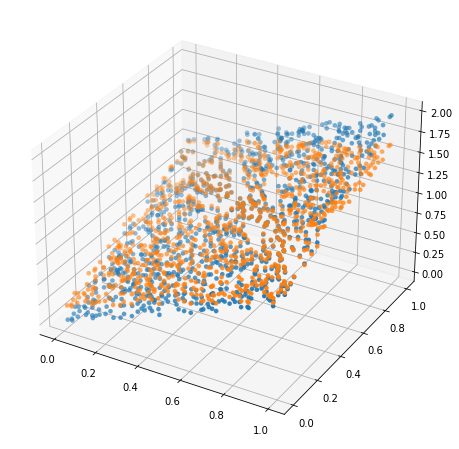

In [25]:
N = 1000

# Erstelle zufällig eingabe
x =torch.rand(N, 2)

y = f(x)

y_pred = model(x)


loss = loss_fn(torch.reshape(y_pred, (-1,)), y)

fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.gca(projection='3d')

ax.scatter(x[:,0].tolist(), x[:,1].tolist(),y.tolist(), linewidth=0.1, antialiased=True)
ax.scatter(x[:,0].tolist(), x[:,1].tolist(),torch.reshape(y_pred, (-1,)).tolist(), linewidth=0.1, antialiased=True)
print(loss.item())
plt.show()